# Telco Customer Churn

By : Farha Apita

Project From : Rakamin Data Scientist Bootcamp

## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Data Checking

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.describe([.25,.5,.75,.9])

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
90%,1.000000,69.000000,102.600000
max,1.000000,72.000000,118.750000


## Average Monthly Charge Based on Payment Method

In [7]:
df1 = df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index()
df1

,PaymentMethod,MonthlyCharges
0,Bank transfer (automatic),67.192649
1,Credit card (automatic),66.512385
2,Electronic check,76.255814
3,Mailed check,43.917060


Text(0.5, 1.0, 'Average Monthly Charges Per Payment Method')

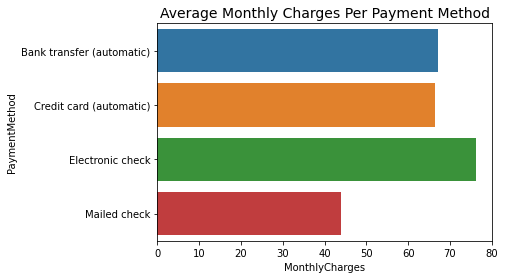

In [8]:
sns.barplot(x = 'MonthlyCharges', y= 'PaymentMethod', data=df1).set_title('Average Monthly Charges Per Payment Method', fontsize = 14)

## Number of Customer Based on Tenure Group

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

In [28]:
conditions  = [df['tenure'] <= 21, 
                df['tenure'].between(21, 40), 
                 df['tenure'] >= 40]
choices     = ['low', 'medium', 'high']
    
df['tenure_period'] = np.select(conditions, choices)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,masa_tenure,partner_dependents,tenure_period
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low,Yes-No,low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,medium,No-No,medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low,No-No,low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high,No-No,high
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low,No-No,low


In [30]:
df_tenure_period = df.groupby('tenure_period')['customerID'].nunique().reset_index()
df_tenure_period

,tenure_period,customerID
0,high,2757
1,low,2941
2,medium,1345


Text(0.5, 1.0, 'The Number of Customers per Tenure Period')

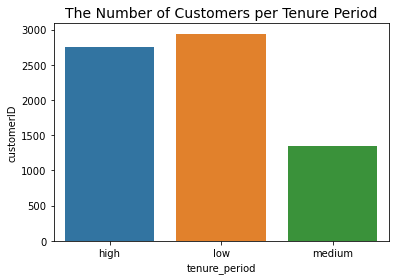

In [33]:
sns.barplot(x ='tenure_period', y='customerID', data=df_tenure_period).set_title('The Number of Customers per Tenure Period', fontsize = 14)

## Phone Service User Percentage Per Citizen Type

In [12]:
df2 = df.groupby(['SeniorCitizen', 'PhoneService'])['customerID'].nunique().reset_index(name='UniqueCust')
df3 = df.groupby(['SeniorCitizen'])['customerID'].nunique().reset_index(name='AllUniqueCustomer')
df_merge = df2.merge(df3, how='inner', on='SeniorCitizen')
df_merge['PercentUniqueCustomer']=round(df_merge['UniqueCust']*100/df_merge['AllUniqueCustomer'],2)
df_merge

,SeniorCitizen,PhoneService,UniqueCust,AllUniqueCustomer,PercentUniqueCustomer
0,0,No,578,5901,9.79
1,0,Yes,5323,5901,90.21
2,1,No,104,1142,9.11
3,1,Yes,1038,1142,90.89


Text(0.5, 1.0, 'Phone Service User Percentage Per Citizen Type')

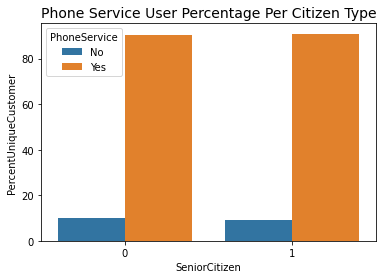

In [13]:
sns.barplot(x='SeniorCitizen', y='PercentUniqueCustomer', data=df_merge, hue='PhoneService').set_title('Phone Service User Percentage Per Citizen Type', fontsize = 14)

## Total Charge Distribution

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_change = df.replace(np.nan, 0, regex=True)

In [15]:
df_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df_change.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df_change['TotalCharges'].median()

1394.55

Text(0.5, 1.0, 'Distribution Of Total Charge')

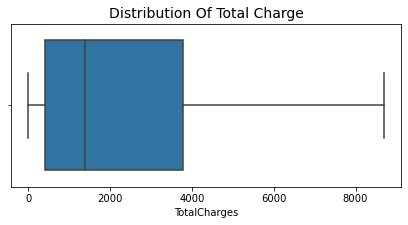

In [18]:
plt.figure(figsize=(7,3))
sns.boxplot(x='TotalCharges', data=df_change).set_title('Distribution Of Total Charge', fontsize = 14)

## Monthly Charges Distribution By Churn

In [19]:
df['MonthlyCharges'].dropna()

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

Text(0.5, 1.0, 'Comparison Graph between Monthly Charges By Churn')

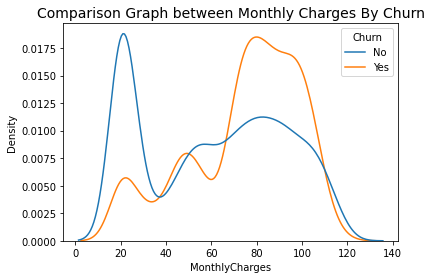

In [20]:
sns.kdeplot(x='MonthlyCharges', hue='Churn', data=df, common_norm = False).set_title('Comparison Graph between Monthly Charges By Churn', fontsize = 14)

## The Impact of Having Partners & Dependents on Customer Churn Rates

In [21]:
df['partner_dependents'] = df['Partner'] + '-' + df['Dependents']
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,masa_tenure,partner_dependents
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low,Yes-No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,medium,No-No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low,No-No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,high,No-No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,low,No-No


In [22]:
df4 = df.groupby(['partner_dependents', 'Churn'])['customerID'].nunique().reset_index(name='jumlah_unique_customer')
df5 = df.groupby(['partner_dependents'])['customerID'].nunique().reset_index(name='all_unique_customer')
df_merge = df4.merge(df5, how='inner', on='partner_dependents')
df_merge['percentage']=round(df_merge['jumlah_unique_customer']*100/df_merge['all_unique_customer'],2)
df_merge[['partner_dependents', 'Churn', 'percentage']]

,partner_dependents,Churn,percentage
0,No-No,No,65.76
1,No-No,Yes,34.24
2,No-Yes,No,78.67
3,No-Yes,Yes,21.33
4,Yes-No,No,74.59
5,Yes-No,Yes,25.41
6,Yes-Yes,No,85.76
7,Yes-Yes,Yes,14.24


Text(0.5, 1.0, 'The Influence of Spouse and Dependents on Churn')

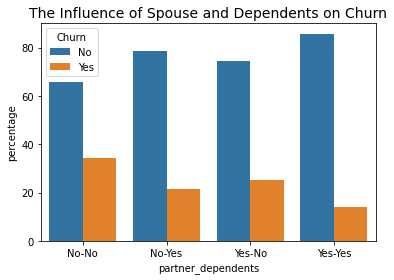

In [26]:
sns.barplot(x='partner_dependents', y='percentage', data=df_merge, hue='Churn').set_title('The Influence of Spouse and Dependents on Churn', fontsize = 14)

## Percentage Churn Customer Based on Payment Method

In [24]:
df6 = df.groupby(['PaymentMethod', 'Churn'])['customerID'].nunique().reset_index(name='jumlah_customer')
df7 = df.groupby(['PaymentMethod'])['customerID'].nunique().reset_index(name='all_customer')
df_merge_2 = df6.merge(df7, how='inner', on='PaymentMethod')
df_merge_2['percentage']=round(df_merge_2['jumlah_customer']*100/df_merge_2['all_customer'],2)
df_merge_2[['PaymentMethod', 'Churn', 'percentage']]

,PaymentMethod,Churn,percentage
0,Bank transfer (automatic),No,83.29
1,Bank transfer (automatic),Yes,16.71
2,Credit card (automatic),No,84.76
3,Credit card (automatic),Yes,15.24
4,Electronic check,No,54.71
5,Electronic check,Yes,45.29
6,Mailed check,No,80.89
7,Mailed check,Yes,19.11


<AxesSubplot:xlabel='PaymentMethod', ylabel='percentage'>

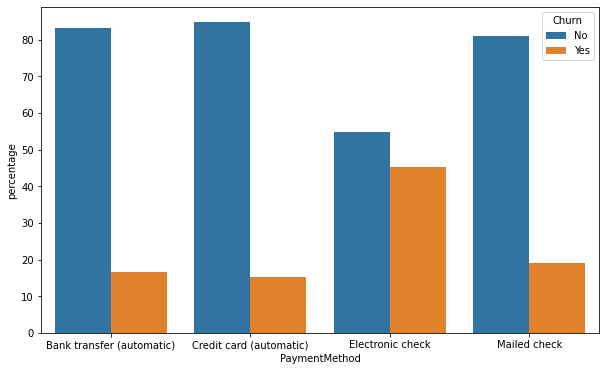

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='PaymentMethod', y='percentage', data=df_merge_2, hue='Churn')

So, from the plot above, it can be concluded that customers who have unsubscribed are more likely to use a credit card as their payment method. Meanwhile, customers who are still subscribed tend to prefer electronic checks as their payment method.